Import the required libraries

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Data Collection and Analysis

In [24]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('heart.csv')

In [25]:
# print head -> first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
# print tail -> last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [27]:
# number of rows and columns in the dataset
df.shape

(1025, 14)

In [28]:
# getting info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [29]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [30]:
# observing statistical measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
# checking the distribution of Target Variable
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

Explorartory Data Analysis

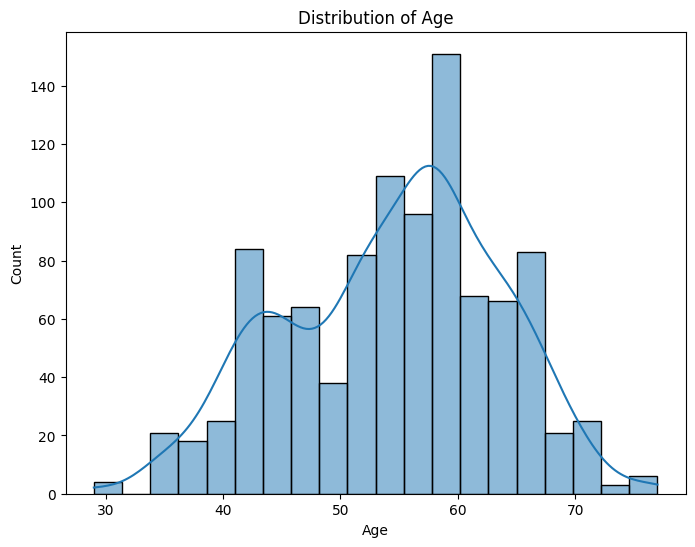

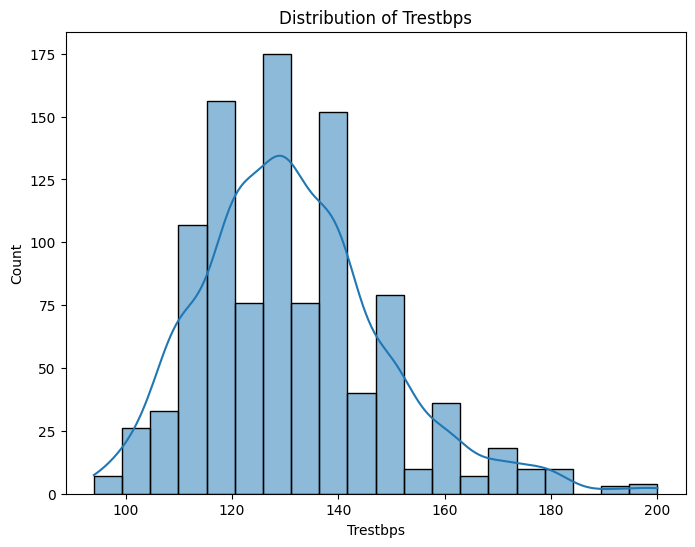

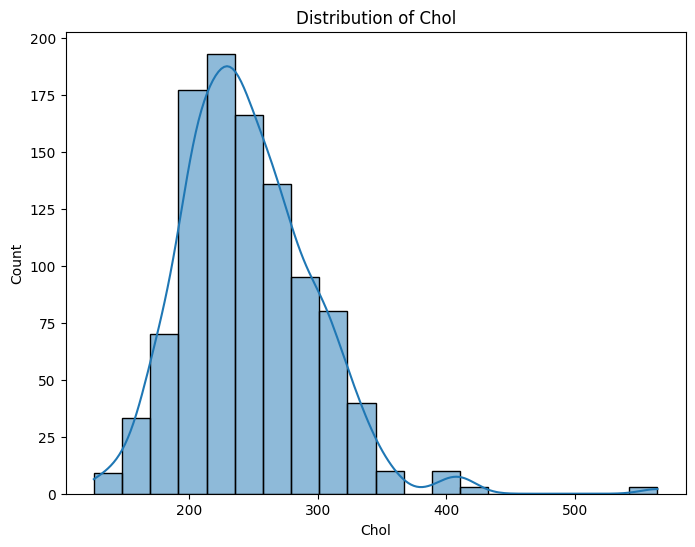

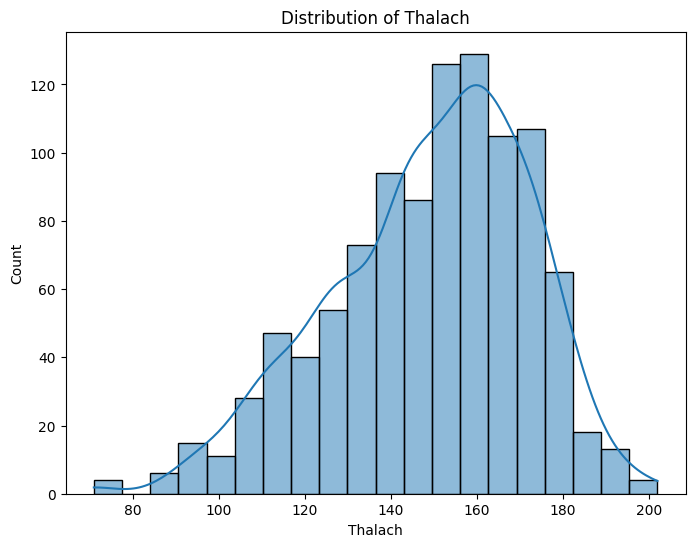

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of columns to visualize
columns_to_visualize = ['age', 'trestbps', 'chol', 'thalach']

# Loop through each column and visualize its distribution
for column in columns_to_visualize:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, bins=20, kde=True)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.show()


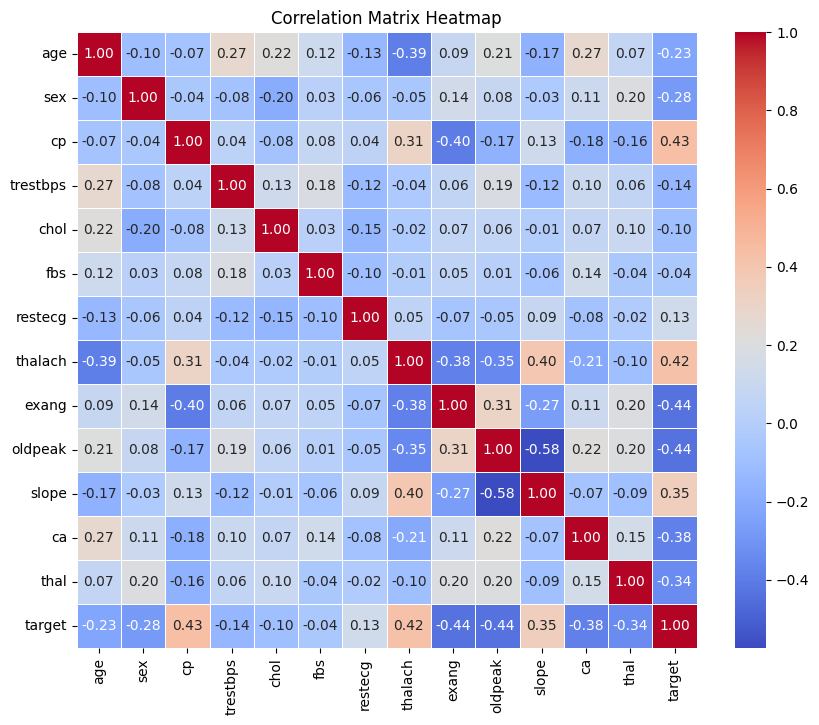

In [33]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

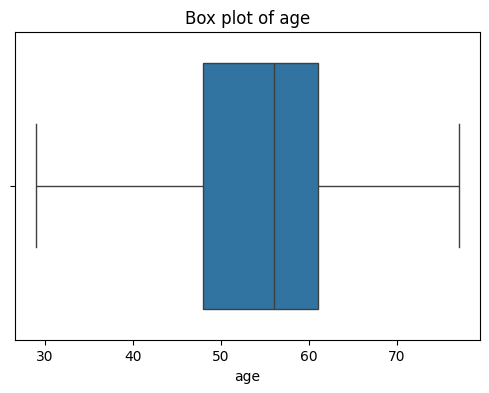

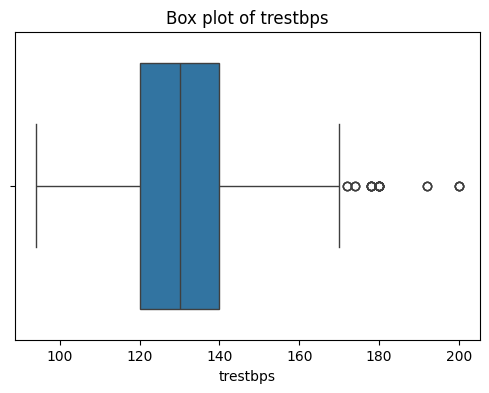

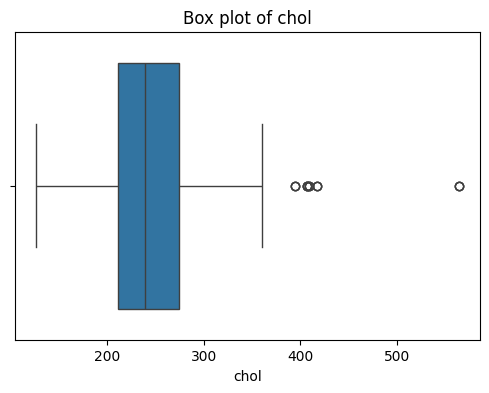

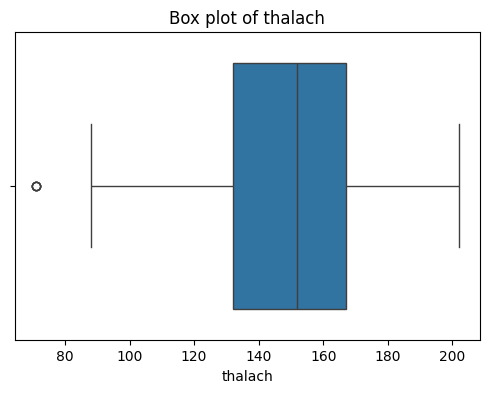

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Function to display outliers using box plots
def display_outliers_boxplot(df, column):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_remove_outliers = ['age', 'trestbps', 'chol', 'thalach']

for column in columns_to_remove_outliers:
    display_outliers_boxplot(df, column)
    df = remove_outliers(df, column)
    df.reset_index(drop=True, inplace=True)


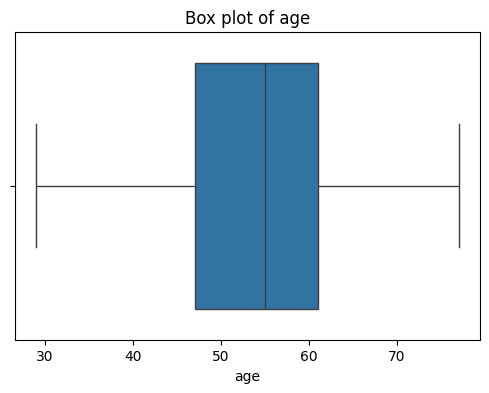

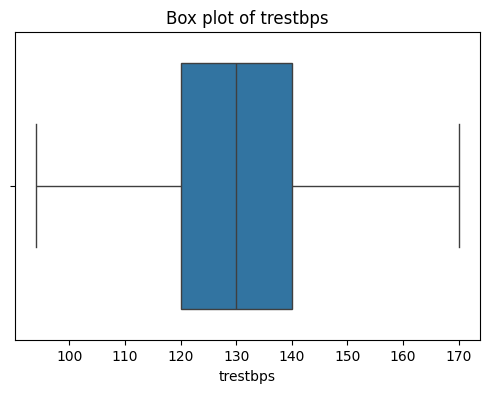

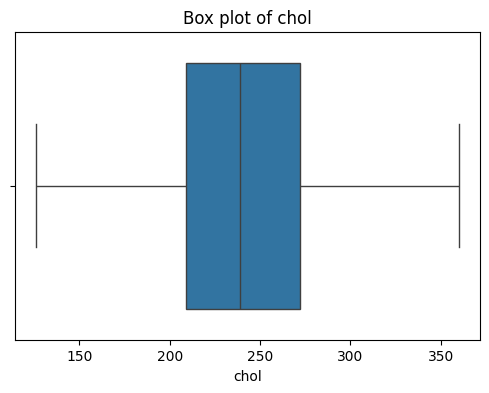

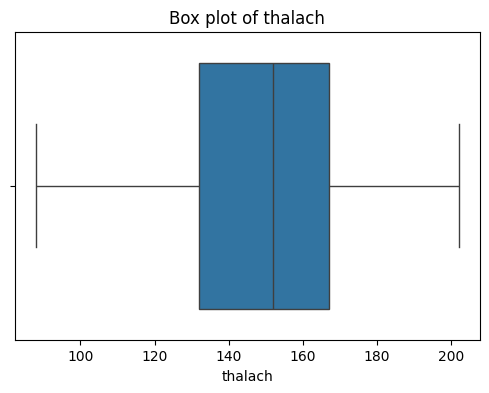

In [35]:
#after removing all the outliers
columns_to_display_outliers = ['age', 'trestbps', 'chol', 'thalach']

for column in columns_to_display_outliers:
    display_outliers_boxplot(df, column)


In [36]:
X = df.drop(columns='target', axis=1)
Y = df['target']

In [37]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
970   59    1   1       140   221    0        1      164      1      0.0   
971   60    1   0       125   258    0        0      141      1      2.8   
972   47    1   0       110   275    0        0      118      1      1.0   
973   50    0   0       110   254    0        0      159      0      0.0   
974   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0    

In [38]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
970    1
971    0
972    0
973    1
974    0
Name: target, Length: 975, dtype: int64


Splitting Training and Testing Data

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [40]:
print(X.shape, X_train.shape, X_test.shape)

(975, 13) (780, 13) (195, 13)


Training the Model and Evaluation

KNN Training Accuracy: 0.90
KNN Test Accuracy: 0.71
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        93
           1       0.71      0.74      0.72       102

    accuracy                           0.71       195
   macro avg       0.71      0.71      0.71       195
weighted avg       0.71      0.71      0.71       195

KNN Confusion Matrix:
[[63 30]
 [27 75]]


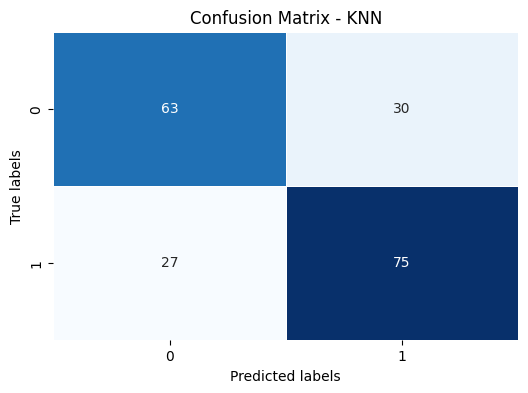

-------------------------------------------------------
Logistic Regression Training Accuracy: 0.85
Logistic Regression Test Accuracy: 0.85
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        93
           1       0.84      0.88      0.86       102

    accuracy                           0.85       195
   macro avg       0.85      0.85      0.85       195
weighted avg       0.85      0.85      0.85       195

Logistic Regression Confusion Matrix:
[[76 17]
 [12 90]]


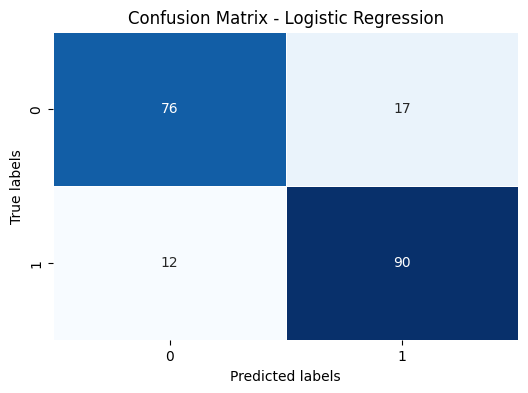

-------------------------------------------------------
Naive Bayes Training Accuracy: 0.83
Naive Bayes Test Accuracy: 0.86
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86        93
           1       0.87      0.86      0.87       102

    accuracy                           0.86       195
   macro avg       0.86      0.86      0.86       195
weighted avg       0.86      0.86      0.86       195

Naive Bayes Confusion Matrix:
[[80 13]
 [14 88]]


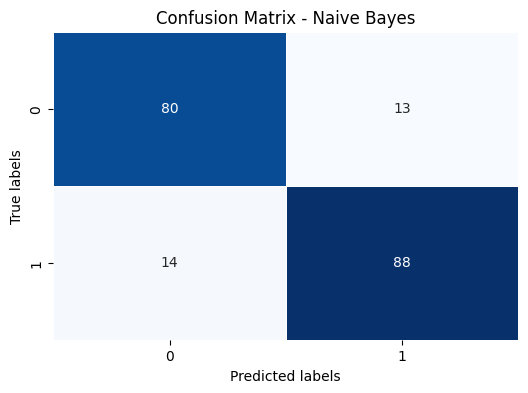

-------------------------------------------------------


In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# Training model



models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions on the training set
    y_train_pred = model.predict(X_train)

    # Evaluate the model on training data
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    print(f'{model_name} Training Accuracy: {train_accuracy:.2f}')

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    test_accuracy = accuracy_score(Y_test, y_pred)
    print(f'{model_name} Test Accuracy: {test_accuracy:.2f}')

    # Generate a classification report
    print(f'{model_name} Classification Report:')
    print(classification_report(Y_test, y_pred))

    # Generate a confusion matrix
    # cm = confusion_matrix(Y_test, y_pred)
    # print(f'{model_name} Confusion Matrix:')
    # print(cm)
    # Generate a confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    print(f'{model_name} Confusion Matrix:')
    print(cm)

    # Heatmap for confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', linewidths=.5, cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    print('-' * 55)

Saving the Model

In [42]:
#importing library
import pickle

In [43]:
filename = 'heart_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [44]:
loaded_model = pickle.load(open('heart_model.sav', 'rb'))